In [131]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import joblib


**Data PreProcessing**

In [132]:
df=pd.read_csv(r'/content/online_sales_dataset.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


**Data Exploration**

In [133]:
df.shape


(49782, 17)

In [134]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [135]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low


In [136]:
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [137]:
df.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [139]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [140]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
print(df.nunique())

InvoiceNo            48494
StockCode             1000
Description             11
Quantity                99
InvoiceDate          49782
UnitPrice            11200
CustomerID           35389
Country                 12
Discount              1047
PaymentMethod            3
ShippingCost          2501
Category                 5
SalesChannel             2
ReturnStatus             2
ShipmentProvider         4
WarehouseLocation        5
OrderPriority            3
dtype: int64


In [144]:
#DROP UNWANTED COLUMNS

df.drop(columns=['InvoiceNo','StockCode','WarehouseLocation'],axis=1, inplace=True)

In [145]:
#After removing unwanted columns
df.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Discount', 'PaymentMethod', 'ShippingCost', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority'],
      dtype='object')

In [146]:
#Finding missing values
df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0
ShippingCost,2489
Category,0


In [147]:
#Percentage of missing data
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_data_percentage)

Description         0.000000
Quantity            0.000000
InvoiceDate         0.000000
UnitPrice           0.000000
CustomerID          9.999598
Country             0.000000
Discount            0.000000
PaymentMethod       0.000000
ShippingCost        4.999799
Category            0.000000
SalesChannel        0.000000
ReturnStatus        0.000000
ShipmentProvider    0.000000
OrderPriority       0.000000
dtype: float64


In [148]:
#Filling Missing Values
df['ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].median())
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mode().iloc[0])

In [149]:
#After filling missing values
df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0
ShippingCost,0
Category,0


In [150]:
#Negative values
print(df[['Quantity', 'UnitPrice']].min())

Quantity    -50.00
UnitPrice   -99.98
dtype: float64


In [151]:
#Rows with negative values
print((df['UnitPrice'] < 0).sum())

1493


In [152]:
#Converting negative to positive values
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: abs(x))

In [153]:
#After converting negative value
print((df['UnitPrice'] < 0).sum())

0


In [154]:
#Calculating Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
df.TotalPrice

,TotalPrice
0,34.439400
1,601.425000
2,927.153500
3,923.227200
4,1024.578137
...,...
49777,1418.400000
49778,278.878600
49779,2932.600000
49780,1312.876800


In [155]:
df.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Discount', 'PaymentMethod', 'ShippingCost', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority',
       'TotalPrice'],
      dtype='object')

In [156]:
#Convert InvoiceDate to datetime format

date_time=df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
print(date_time)

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
4       2020-01-01 04:00:00
                ...        
49777   2025-09-05 01:00:00
49778   2025-09-05 02:00:00
49779   2025-09-05 03:00:00
49780   2025-09-05 04:00:00
49781   2025-09-05 05:00:00
Name: InvoiceDate, Length: 49782, dtype: datetime64[ns]


In [157]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceWeekday'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

In [158]:
df[[ 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour']].sample(5)

,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour
19734,2022,4,2,Saturday,6
40854,2024,8,29,Thursday,6
8974,2021,1,8,Friday,22
45544,2025,3,12,Wednesday,16
31591,2023,8,9,Wednesday,7


In [159]:
#dropped invoicedate column
df.drop('InvoiceDate', axis=1, inplace=True)

In [160]:
df.columns

Index(['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country',
       'Discount', 'PaymentMethod', 'ShippingCost', 'Category', 'SalesChannel',
       'ReturnStatus', 'ShipmentProvider', 'OrderPriority', 'TotalPrice',
       'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday',
       'InvoiceHour'],
      dtype='object')

# **Label Conversion**

In [161]:
#Identifying categorical columns
df.select_dtypes(include='object').columns

Index(['Description', 'Country', 'PaymentMethod', 'Category', 'SalesChannel',
       'ReturnStatus', 'ShipmentProvider', 'OrderPriority', 'InvoiceWeekday'],
      dtype='object')

In [162]:
#Label enncoding for columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['OrderPriority'] = le.fit_transform(df['OrderPriority'])
df['SalesChannel'] = le.fit_transform(df['SalesChannel'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['ReturnStatus'] = le.fit_transform(df['ReturnStatus'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])
df['Category'] = le.fit_transform(df['Category'])
df['ShipmentProvider'] = le.fit_transform(df['ShipmentProvider'])
df['InvoiceWeekday'] = le.fit_transform(df['InvoiceWeekday'])

'Description','Country', 'Category', 'ShipmentProvider', 'InvoiceWeekday'

('Description', 'Country', 'Category', 'ShipmentProvider', 'InvoiceWeekday')

In [163]:
df.dtypes

,0
Description,int64
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,int64
Discount,float64
PaymentMethod,int64
ShippingCost,float64
Category,int64
SalesChannel,int64


In [164]:
df

,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour
0,9,38,1.71,37039.0,0,0.470000,0,10.79,1,0,0,3,2,34.439400,2020,1,1,6,0
1,9,18,41.25,19144.0,8,0.190000,2,9.51,2,1,0,3,2,601.425000,2020,1,1,6,1
2,3,49,29.11,50472.0,3,0.350000,0,23.03,2,1,1,3,0,927.153500,2020,1,1,6,2
3,2,14,76.68,96586.0,5,0.140000,2,11.08,0,1,0,2,1,923.227200,2020,1,1,6,3
4,7,-30,68.11,53125.0,10,1.501433,0,17.50,2,0,0,1,2,1024.578137,2020,1,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,1,25,70.92,51445.0,8,0.200000,1,8.96,2,1,1,3,2,1418.400000,2025,9,5,0,1
49778,7,7,51.74,28879.0,11,0.230000,0,23.55,2,1,0,1,1,278.878600,2025,9,5,0,2
49779,5,43,85.25,21825.0,7,0.200000,0,16.26,3,0,0,1,0,2932.600000,2025,9,5,0,3
49780,4,48,39.64,43199.0,10,0.310000,2,28.56,1,1,0,2,2,1312.876800,2025,9,5,0,4


# **Handling Outliers**

In [165]:
#detect outliers in all numeric columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n📊 Column: {col}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {outliers.shape[0]}")



📊 Column: Description
  Lower Bound: -7.00
  Upper Bound: 17.00
  Number of Outliers: 0

📊 Column: Quantity
  Lower Bound: -28.00
  Upper Bound: 76.00
  Number of Outliers: 1090

📊 Column: UnitPrice
  Lower Bound: -48.40
  Upper Bound: 149.63
  Number of Outliers: 0

📊 Column: CustomerID
  Lower Bound: -24283.62
  Upper Bound: 134241.38
  Number of Outliers: 0

📊 Column: Country
  Lower Bound: -8.50
  Upper Bound: 19.50
  Number of Outliers: 0

📊 Column: Discount
  Lower Bound: -0.24
  Upper Bound: 0.76
  Number of Outliers: 996

📊 Column: PaymentMethod
  Lower Bound: -3.00
  Upper Bound: 5.00
  Number of Outliers: 0

📊 Column: ShippingCost
  Lower Bound: -6.27
  Upper Bound: 41.22
  Number of Outliers: 0

📊 Column: Category
  Lower Bound: -2.00
  Upper Bound: 6.00
  Number of Outliers: 0

📊 Column: SalesChannel
  Lower Bound: -1.50
  Upper Bound: 2.50
  Number of Outliers: 0

📊 Column: ReturnStatus
  Lower Bound: 0.00
  Upper Bound: 0.00
  Number of Outliers: 4894

📊 Column: Shipment

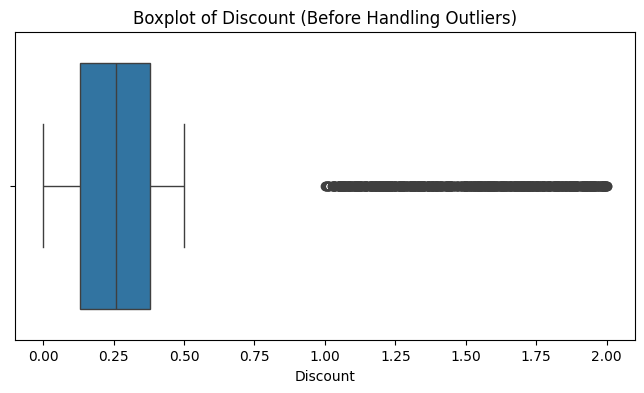

In [166]:
#Check Outliers using Boxplot (for Discount)

# Boxplot before handling outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount (Before Handling Outliers)')
plt.show()

In [167]:
#Handling Outliers in Discount
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df['Discount'] = np.where(df['Discount'] < lower_bound, lower_bound,
                          np.where(df['Discount'] > upper_bound, upper_bound, df['Discount']))

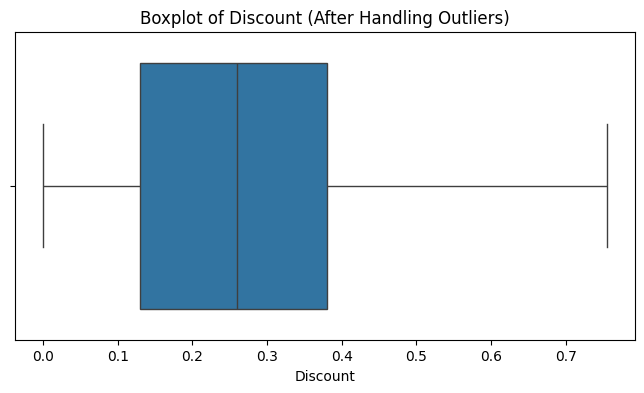

In [168]:
#After handling outliers

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount (After Handling Outliers)')
plt.show()



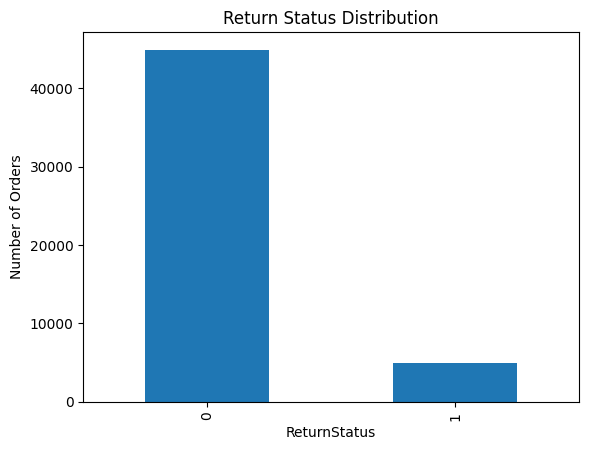

In [169]:
#Visualizations -BAR CHART

df['ReturnStatus'].value_counts().plot(kind='bar', title='Return Status Distribution')
plt.ylabel('Number of Orders')
plt.show()

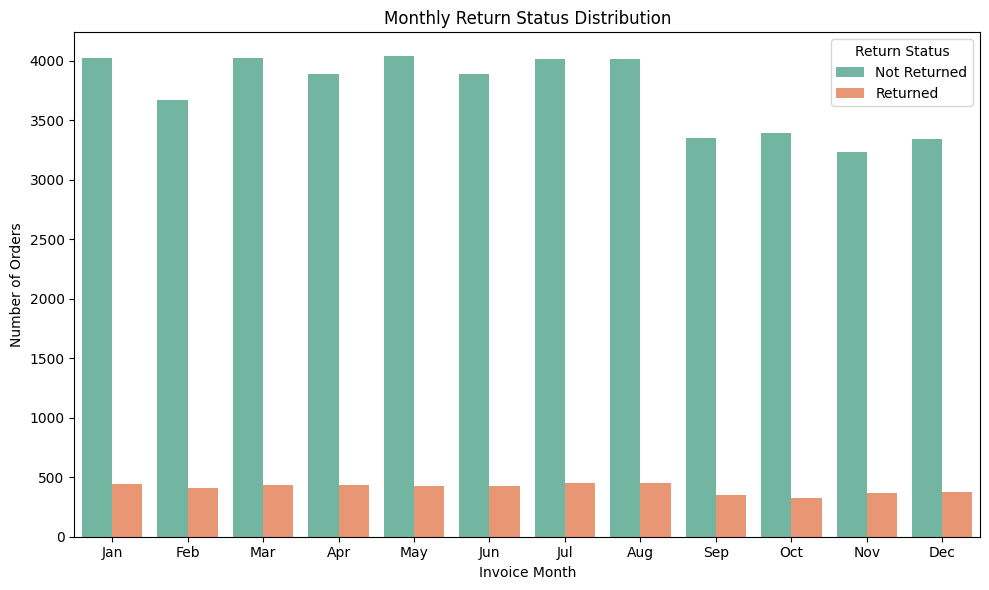

In [170]:
# COUNTPLOT
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='InvoiceMonth',
    hue=df['ReturnStatus'].map({0: 'Not Returned', 1: 'Returned'}),
    palette='Set2'
)

plt.title("Monthly Return Status Distribution")
plt.xlabel("Invoice Month")
plt.ylabel("Number of Orders")
plt.legend(title="Return Status")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

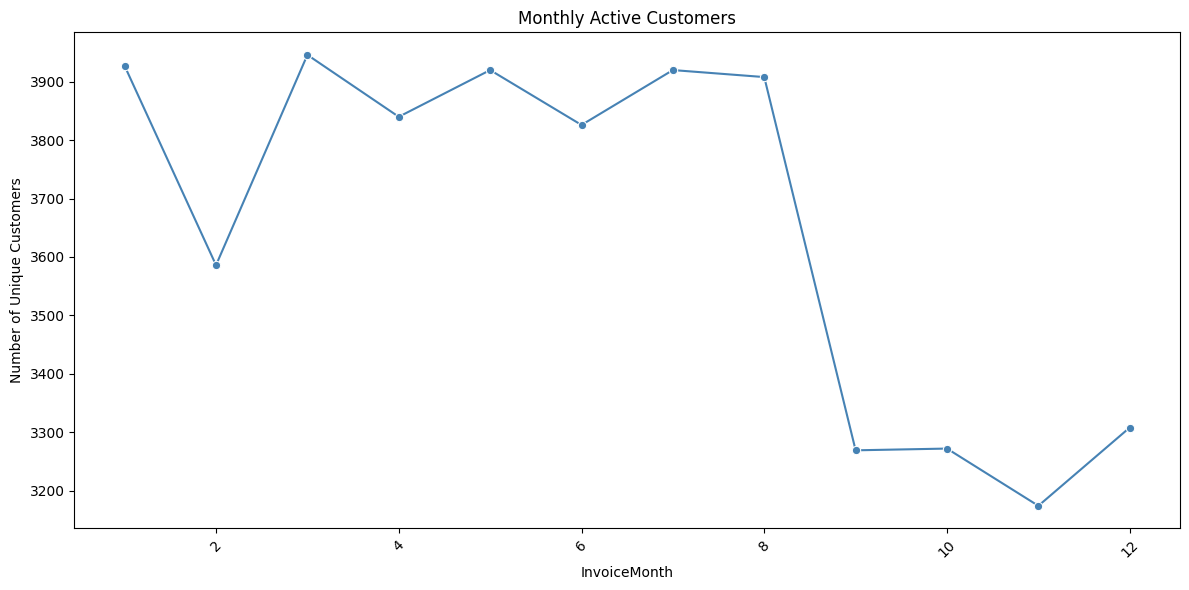

In [171]:
# Group by Month and count unique customers
monthly_customers = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()

# Plotting line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x='InvoiceMonth', y='CustomerID', marker='o', color='steelblue')


plt.title('Monthly Active Customers')
plt.xlabel('InvoiceMonth')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [172]:
#Standard Scaler
columns_to_scale = ['UnitPrice', 'ShippingCost']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [173]:
print(df[columns_to_scale].describe())

          UnitPrice  ShippingCost
count  4.978200e+04  4.978200e+04
mean  -2.830353e-16 -1.734180e-16
std    1.000010e+00  1.000010e+00
min   -1.735300e+00 -1.775420e+00
25%   -8.659023e-01 -8.461338e-01
50%   -2.448845e-03  7.384925e-04
75%    8.652883e-01  8.405061e-01
max    1.726556e+00  1.776897e+00


In [174]:
df.dtypes

,0
Description,int64
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,int64
Discount,float64
PaymentMethod,int64
ShippingCost,float64
Category,int64
SalesChannel,int64


In [175]:
df.to_csv("preprocessed_sales_data.csv", index=False)

In [176]:
from google.colab import files
files.download("preprocessed_sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>